<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis?fbclid=IwAR1r7DMXKvnMr-keVwlp7FtSSnxsj01HkhPANfLBF3WFTFo-YEdl8isAU80



**Assumtion**

In [1]:
import pandas as pd #เรียกใช้เเพนด้า

In [2]:
BFI_data = pd.read_csv('/content/bfi.csv') #copy path csv ตรงๆ
BFI_data.head() #show data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


ซึงข้อมูลข้างต้นที่ได้มาจะเป็นข้อมูลที่ได้จากแบบสอบถาม จะเป็นคะเเนนจากแบบทดสอบ Unname คือ รหัส เช่น รหัสนักศึกษา or primary key

**Factor Analysis**

Assumtion: ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว 

มีตัวแปร Factor(latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ โดย K < n

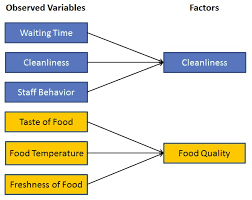

# Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect **multicollinearity**.

* There should not be **homoscedasticity** between the variables.

**homoscedasticity** คือ ค่าความคลาดเคลื่อนจะเท่ากันตลอดทั้งเส้นทาง

ภาวะร่วมเส้นตรงหลายตัวแปรที่สมบูรณ์ (Perfect Multicollinearity)

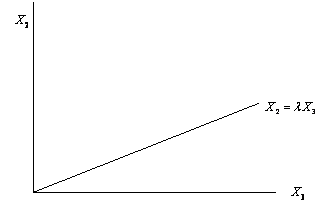

**การทำ Factor Analysi**

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

แก้ error by copy code that is error
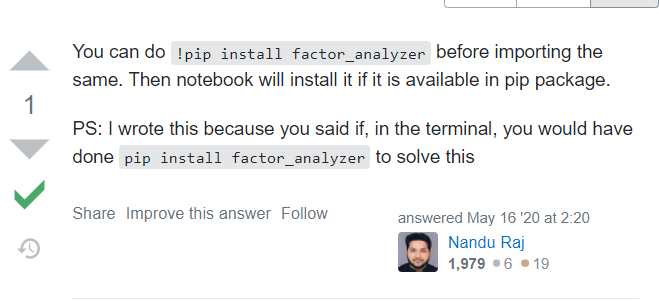

install package factor_analyzer


In [4]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=f354e6c64a3a8df86527194b41f8053372986808466b3a2cd80454aa415643a4
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [5]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 
#in chapter3 from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o5 ด้วยคำสั่ง .iloc[]

In [6]:
BFI_data.shape

(2800, 29)

In [7]:
BFI_data_dropped = BFI_data.iloc[:,1:26]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [8]:
## เฉลย
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [10]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [11]:
BFI_data_dropped.shape

(2436, 25)

There should not be prefact multicollonearity : เช่น การหา correlation จะได้เท่ากับ 1 หรือ plot กราฟจะได้เป็นเส้นตรง ต้องไม่มีค่าแบบนี้

#**Bartlett’s test**

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#**Kaiser-Meyer-Olkin (KMO) Test**

ถ้า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis


In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

เราสามารถดูได้ว่า ถ้า p-value เท่ากับ 0 แสดงว่า data ที่เรามีไม่มี prefact multicollonearity

#** Factor Analysis**

In [15]:
from factor_analyzer import  FactorAnalyzer #import

In [16]:
fa = FactorAnalyzer(n_factors=20)#define

In [18]:
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped2)
chi_square_value, p_value #จะบอกค่าว่ามี chi_square เท่าไหร่ p_value

NameError: ignored

##**Fit-transform**

In [19]:
data_fa = fa.fit_transform(BFI_data_dropped)
data_fa.shape

(2436, 20)

In [20]:
 ev, v = fa.get_eigenvalues() #ตรวจดูว่าควรลดเหลือกี่ dimention (มี factor)

##**ใช้ eigen values**

In [21]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

#**Scree plot**

TypeError: ignored

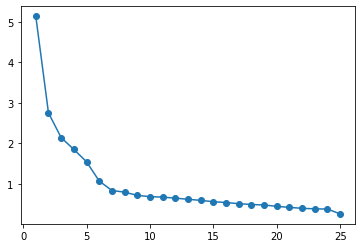

In [22]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),BFI_data_dropped.shape[1]+1*[1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [24]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.analyze(BFI_data_dropped, 25, rotation=None)
# Checl Ejgenvalues

AttributeError: ignored

In [26]:
data_fa[:,:6] #ที่เป็น 6 ตัวเพราะ ตัวที่ 1-6 มีค่ามากกว่า 1 

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

##Factor Loading 

In [30]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [31]:
fa2.loadings_.shape

#เป็นการบอกว่ามีกี่ตัวแปร แล้วดูตัวแปรไหนมีอิทธิพลบ้าง

(25, 6)

parameters จำนวน factor เท่ากับ 6

##**plot factor loadings**

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

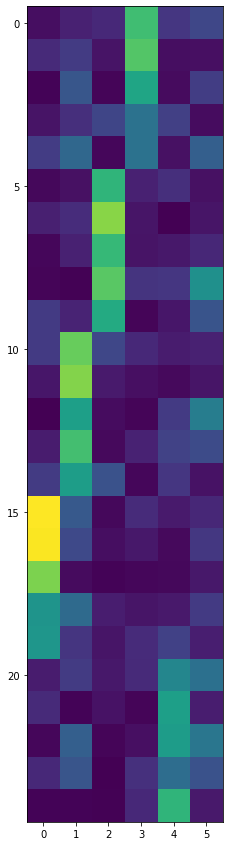

In [33]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

In [34]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

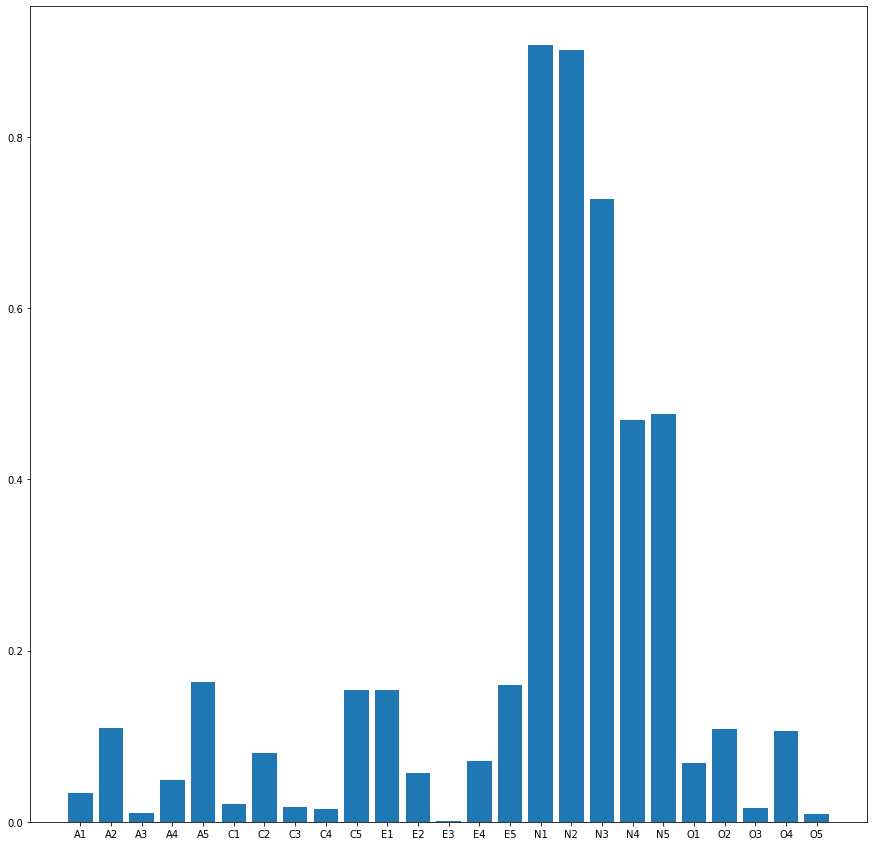

In [35]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# **Exam 3**

***use Factor Analysis Fifa 2018 data ***

ขั้นตอนแรก ให้นำเข้าไฟล์ข้อมูลที่จะใช้ 



```
import FIFA 2018 Statistics.csv
```
ดาวโหลดไฟล์แล้ว copy past


In [36]:
exam3 = pd.read_csv('FIFA 2018 Statistics.csv')
exam3

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


##**จากโจทย์ให้คัดเลือกเฉพาะข้อมูลตั้งแต่ Goal - scored ถึง red**

ดังนั้น เราจึงต้องเช็คดูขนาดก่อน จึงจะสามารถกำหนดค่าได้ 

In [37]:
exam3.shape

(128, 27)

In [38]:
exam3_drop = exam3.iloc[:,3:20] #กำหนดคอลัมน์ที่ต้องการ
exam3_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


ตรวจสอบขนาดของข้อมูลหลังทำการเลือกข้อมูล

In [39]:
exam3_drop.shape

(128, 17)

ขั้นตอนที่ 2 การทำ Bartlett’s test

Bartlett’s test 
Perform Bartlett’s test for equal variances.

Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

โดยจะพิจารณาจากค่า P-value ที่ควรให้เข้าใกล้ 0 มากที่สุด

In [41]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(exam3_drop)

chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

จากผลการทำ Bartlett’s test จะเห็นว่า ค่า  P-value มีค่า 2.713580160466225e-189 ซึ่งค่าเข้าใกล้ 0 มาก ดังนั้นจึงถือว่าสามารถทำขั้นตอนต่อไปได้

ขั้นตอนที่ 3 การทำ KMO Test หรือ Kaiser-Meyer-Olkin Test
ซึ่งตัวแบบที่ดี และสามารถทำต่อได้ควรมีค่า มากกว่า 0.6

In [45]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(exam3_drop)
kmo_model

0.5594556344508279

จากผลการทำ KMO test จะเห็นว่ามีค่า 0.5594556344508279 ซึ่งค่าใกล้เคียงกับ 0.6 มาก ดังนั้นจึงถือว่าสามารถทำขั้นตอน Factor Analysis ต่อไปได้

ขั้นตอนที่ 4 การทำ Factor Analysis

In [49]:
from factor_analyzer import FactorAnalyzer #import data
exam_fa = FactorAnalyzer(n_factors=10) 
#defind shape or n in how to factor analysis
data_exam_fa = exam_fa.fit_transform(exam3_drop)

ดังนั้น เราจึงต้องเช็คดูขนาดก่อน จึงจะสามารถกำหนดค่าได้ 

In [50]:
data_exam_fa.shape #check data shape

(128, 10)

In [51]:
ev,v = exam_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

ขั้นตอนที่ 5 การทำ scree plot
เพื่อดูลักษณะข้อมูล การพิจารณาข้อมูล หรือ ตัวแบบโดยการวาดกราฟ จะทำให้ง่ายขึ้น

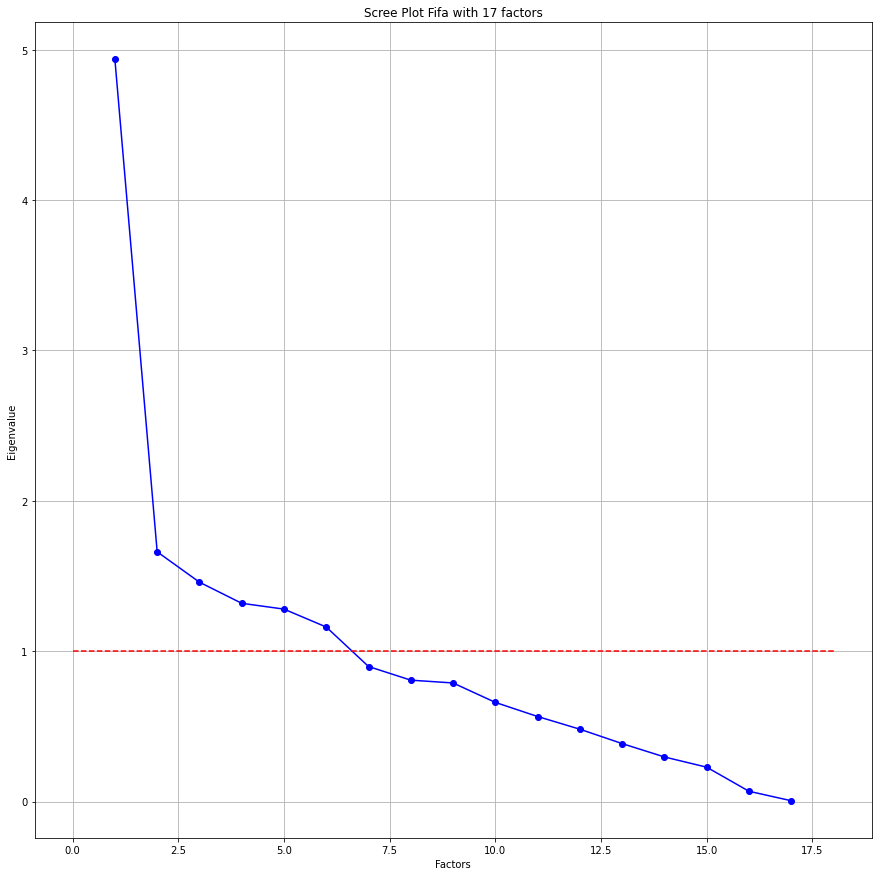

In [52]:
plt.plot(range(1,exam3_drop.shape[1]+1),ev,'bo-')
plt.plot([0,exam3_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot Fifa with 17 factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

จากการแสดงผลของกราฟจะเห็นว่า ข้อมูล มีค่า factor มากกว่า 1 อยู่ 6 ตัว

In [53]:
data_exam_fa[:,:6] #กำหนดจำนวนคอลัมน์

array([[-1.14061137e+00,  1.05033795e+00,  2.79854567e+00,
         3.57574560e-01, -5.95152711e-02, -7.48334076e-02],
       [ 5.33831171e-01, -1.78150280e-01, -1.10088651e+00,
         1.81432000e-02, -8.36944321e-01, -7.31531607e-01],
       [-7.29379706e-01,  3.96402498e-01, -7.02153492e-01,
        -2.77221903e-01,  1.34345254e-01, -5.61356514e-01],
       [ 7.08580342e-01,  3.36178613e-01, -3.31529441e-01,
        -2.60518967e-01, -1.38667315e+00,  1.34916077e-01],
       [ 3.25530467e-01, -3.71841487e-01, -4.14431700e-01,
         3.27492853e-01,  2.50366459e-01,  2.57255932e-01],
       [-1.34130209e+00, -5.34562069e-01,  2.52429472e-01,
        -5.22235915e-01,  1.05852627e+00, -1.07428697e+00],
       [-5.46867894e-01, -4.92844282e-01,  9.46711298e-01,
        -3.59877314e-01, -1.85391071e-01, -3.25465436e-01],
       [ 1.67488741e+00, -4.32704892e-01,  7.61605381e-01,
        -3.70473849e-01, -8.35201718e-01, -5.88310671e-01],
       [ 2.62530209e-01, -3.24159295e-01,  6.589

ขั้นตอนที่ 6 อ่านข้อมูลด้วย Paremeters โดยกำหนดใฟ้ factor มีจำนวนเท่ากับ 6

In [57]:
from factor_analyzer import FactorAnalyzer
exam_fa2 = FactorAnalyzer(n_factors=6)
data_exam_fa2 = exam_fa2.fit_transform(exam3_drop)

In [58]:
exam_fa2.loadings_.shape

(17, 6)

ขั้นตอนที่ 7  Plot factor loadings by Matrix plot

โดยเราจะพิจารณาจากสีของข้อมูลแต่ละช่วง ถ้าสีสว่าง คือ มาก ถ้า สีทึบ คือ น้อย 

In [59]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

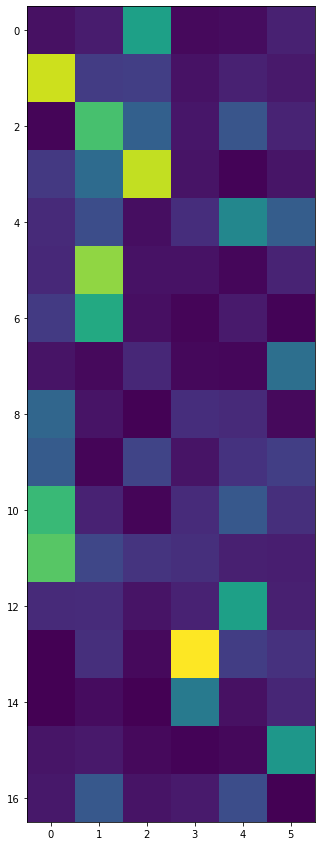

In [60]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(exam_fa2.loadings_))

ขั้นตอนที่ 8 วาดกราฟแท่ง

In [61]:
exam3_drop.columns 

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

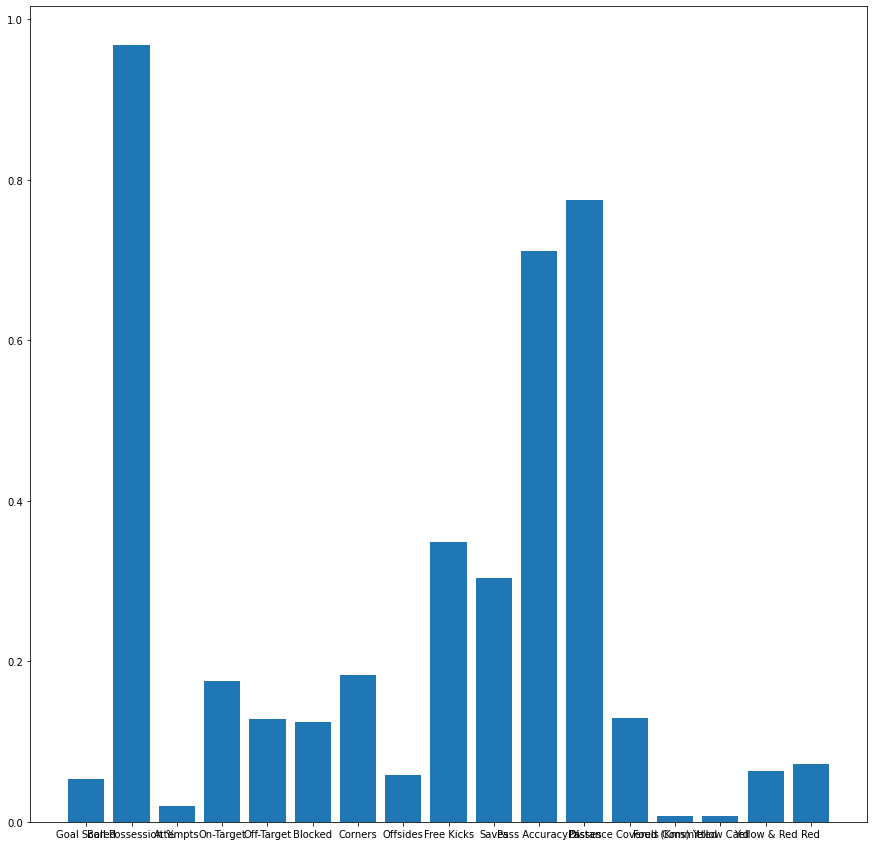

In [63]:
plt.bar(range(17),np.absolute(exam_fa2.loadings_[:,0]),tick_label=exam3_drop.columns)

จากการวิเคราะห์ผล สามารถสรุปผลได้ว่า มีตัวแปรอิสระ หรือตัวแปรfactor 6 ตัวแปร ที่สามารถ ทำนาย อธิบายข้อมูลได้ นอกจากนี้ยังสามารถใช้ Exporatory Factors Analysis และConfirmatory Factors Analysis ได้อีกด้วย

#**จบ**